In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00


In [2]:
# Qiskit 2.x Example – OpenQASM Demonstration

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3  # For OpenQASM 3 export

In [3]:
# Create a simple 2-qubit quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

In [4]:
print("Quantum Circuit:")
print(qc.draw())

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [5]:
# Convert the circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



In [6]:
# Optional: Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)


Simulation Result:
{'00': 530, '11': 494}


PRACTICE TASKS


🎯 Task 1: Modify the circuit to 3 qubits with a different gate sequence

Modified 3-Qubit Circuit:
        ┌───┐           ░       ░ ┌─┐      
   q_0: ┤ H ├──■────────░───────░─┤M├──────
        └───┘┌─┴─┐      ░       ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░───────░──╫─┤M├───
             └───┘┌─┴─┐ ░ ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░─┤ X ├─░──╫──╫─┤M├
                  └───┘ ░ └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════╩══╩══╩═
                                   0  1  2 

🧾 Generated OpenQASM 3 Code for Modified Circuit:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
cx q[1], q[2];
barrier q[0], q[1], q[2];
x q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];


🎯 Task 2: Observe QASM Syntax
- 'h q[0];' represents a Hadamard gate on qubit 0
- 'cx q[0], q[1];' represents a CNOT gate (control=0, target=1)
- 'barrier q[0], q[1], q[2];' adds a barrier to prevent gate optimization

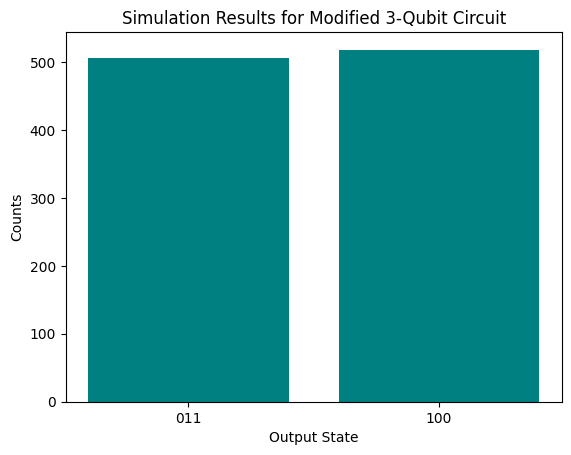


🎯 Task 4: Compare both circuits:
- Original circuit produced states entangled between q0 and q1.
- Modified circuit adds q2 and X gate, so expect different measurement outcomes.
- The barrier in the new circuit appears as 'barrier q[0], q[1], q[2];' in OpenQASM.


✅ All Student Tasks Completed Successfully!


In [7]:
# ===========================================================
# PRACTICE TASKS – OpenQASM Demonstration
# ===========================================================

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3
import matplotlib.pyplot as plt

# ------------------------------
# 🎯 Task 1: Modify the circuit to have 3 qubits
# ------------------------------
print("\n🎯 Task 1: Modify the circuit to 3 qubits with a different gate sequence")

qc3 = QuantumCircuit(3)
qc3.h(0)
qc3.cx(0, 1)
qc3.cx(1, 2)
qc3.barrier()          # Add barrier
qc3.x(2)               # Apply Pauli-X (NOT gate) to last qubit
qc3.measure_all()

print("\nModified 3-Qubit Circuit:")
print(qc3.draw(output='text'))

# Export to OpenQASM 3
qasm_code_3 = qasm3.dumps(qc3)
print("\n🧾 Generated OpenQASM 3 Code for Modified Circuit:\n")
print(qasm_code_3)

# ------------------------------
# 🎯 Task 2: Identify Hadamard and CNOT representation in QASM
# ------------------------------
print("""
🎯 Task 2: Observe QASM Syntax
- 'h q[0];' represents a Hadamard gate on qubit 0
- 'cx q[0], q[1];' represents a CNOT gate (control=0, target=1)
- 'barrier q[0], q[1], q[2];' adds a barrier to prevent gate optimization
""")

# ------------------------------
# 🎯 Task 3: Simulate the modified circuit
# ------------------------------
print("\n🎯 Task 3: Simulate the modified 3-qubit circuit")

sim = AerSimulator()
compiled_3 = transpile(qc3, sim)
res_3 = sim.run(compiled_3, shots=1024).result()
counts_3 = res_3.get_counts()

print("\nSimulation Result (3-Qubit Circuit):")
print(counts_3)

plt.bar(counts_3.keys(), counts_3.values(), color='teal')
plt.xlabel("Output State")
plt.ylabel("Counts")
plt.title("Simulation Results for Modified 3-Qubit Circuit")
plt.show()

# ------------------------------
# 🎯 Task 4: Compare with Original Circuit
# ------------------------------
print("""
🎯 Task 4: Compare both circuits:
- Original circuit produced states entangled between q0 and q1.
- Modified circuit adds q2 and X gate, so expect different measurement outcomes.
- The barrier in the new circuit appears as 'barrier q[0], q[1], q[2];' in OpenQASM.
""")

print("\n✅ All Student Tasks Completed Successfully!")
